## Working with images

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = plt.imread('../images/floor.jpg')


In [2]:
image.shape

(480, 480, 3)

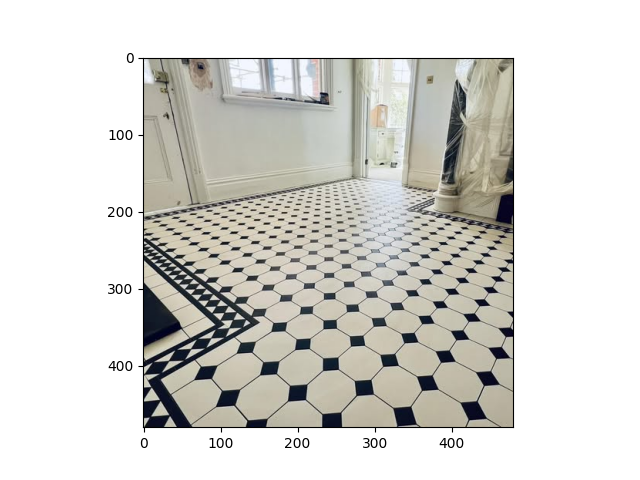

In [3]:
# Display the image
%matplotlib widget
fig, ax = plt.subplots()
ax.imshow(image)

Images are np arrays of shape (h, w, channel). The origin, in this case, is the bottom left corner.

#### Image manipulation (transforms, rotations, etc)

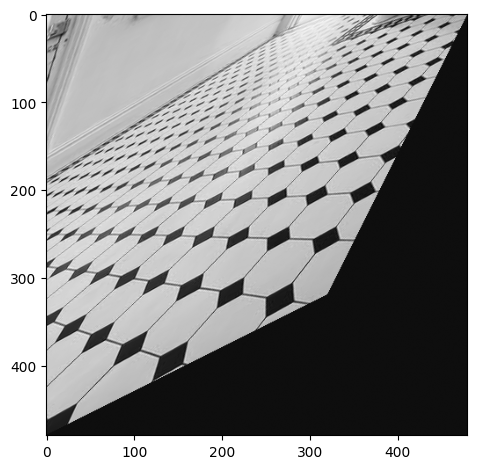

In [3]:
import numpy as np
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img = rgb2gray(imread('../images/floor.jpg'))
w, h = img.shape
# Initialize a list to hold the transformed images
transformed_images = []
labels = []
# Original Image
transformed_images.append(img)
labels.append('1. Original')

lambda1 = 0.5
mat_shear = np.array([[1, lambda1, 0], [lambda1, 1, 0], [0, 0, 1]])
img5 = ndi.affine_transform(img, mat_shear)
transformed_images.append(img5)
labels.append('4. Rotate the Image ')

fig, ax = plt.subplots()
ax.imshow(img5, cmap='gray')
plt.tight_layout()
plt.show()

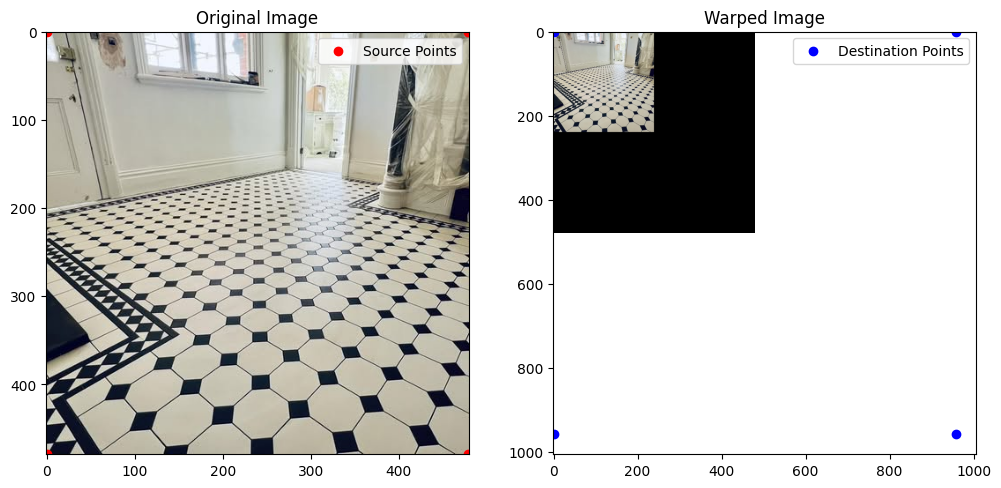

In [7]:

import numpy as np
from skimage import transform, io
import matplotlib.pyplot as plt

# Load an image
image = io.imread('../images/floor.jpg')

# Define source points (corners of a rectangle in the input image)
src_points = np.array([
    [0, 0],  # Top-left corner
    [479, 0],  # Top-right corner
    [479, 479],  # Bottom-right corner
    [0, 479]   # Bottom-left corner
])

# Define destination points (where those corners should map to)
dst_points = 2*np.array([
    [0, 0],  # Top-left corner
    [479, 0],  # Top-right corner
    [479, 479],  # Bottom-right corner
    [0, 479],  
])

# Estimate the transformation
projective_transform = transform.ProjectiveTransform()
projective_transform.estimate(src_points, dst_points)

# Transform the image
output_shape = (image.shape[0], image.shape[1])  # Keep the same dimensions
warped_image = transform.warp(image, projective_transform, output_shape=output_shape)

# Visualize the result
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].scatter(src_points[:, 0], src_points[:, 1], color='red', label='Source Points')
axes[0].legend()
axes[0].set_title('Original Image')

axes[1].imshow(warped_image)
axes[1].scatter(dst_points[:, 0], dst_points[:, 1], color='blue', label='Destination Points')
axes[1].legend()
axes[1].set_title('Warped Image')

plt.show()
